## Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# show plot in the same window


%matplotlib inline
# import keras module from tensorflow
from tensorflow import keras


In [38]:
# load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
len(X_train)

60000

In [40]:
len(X_test)

10000

In [41]:
X_train[0].shape

(28, 28)

In [42]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

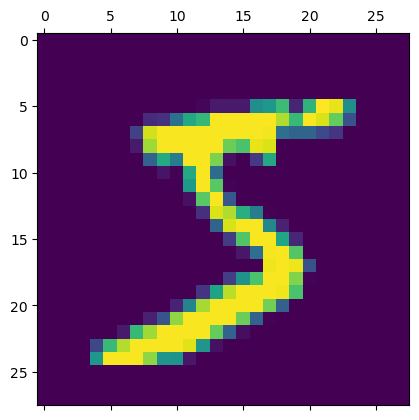

In [43]:
plt.matshow(X_train[0])

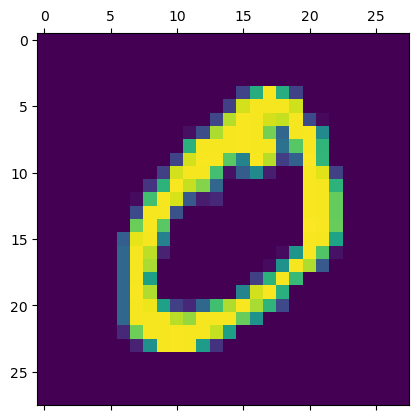

In [44]:
plt.matshow(X_train[1])

In [45]:
y_train[2]

4

In [46]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
# Scalling the data, values are between 0 and 255
X_train = X_train/255
X_test = X_test/255

In [49]:
# converting into single dimension array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# output 10, input 784
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9262


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9259


[0.2724018692970276, 0.9258999824523926]

In [52]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


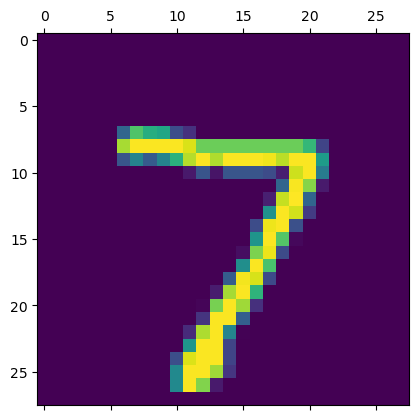

In [53]:
plt.matshow(X_test[0])

In [55]:
y_predicted[0]

array([3.63076963e-02, 2.65295142e-07, 5.17442040e-02, 9.53336239e-01,
       2.52672355e-03, 1.20995767e-01, 1.64635367e-06, 9.99771059e-01,
       1.10861495e-01, 6.77430809e-01], dtype=float32)

In [56]:
np.argmax(y_predicted[0])

7

In [57]:
np.argmax(y_predicted[1])

2

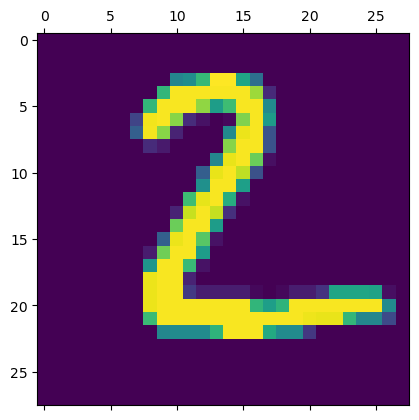

In [58]:
plt.matshow(X_test[1])

In [60]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [61]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    2,    4,    2,   14,    0],
       [   9,    9,  912,   23,    7,    3,   13,    9,   42,    5],
       [   3,    0,   16,  927,    0,   22,    2,   10,   22,    8],
       [   2,    1,    4,    1,  916,    0,    9,    3,   10,   36],
       [  10,    1,    2,   39,    9,  777,   13,    6,   29,    6],
       [  16,    3,    6,    2,    8,   12,  907,    2,    2,    0],
       [   2,    5,   22,    8,   10,    1,    0,  940,    4,   36],
       [   9,    6,    5,   20,    9,   22,    7,    8,  881,    7],
       [  11,    5,    1,    8,   28,    7,    0,   16,    9,  924]])>

Text(95.72222222222221, 0.5, 'Truth')

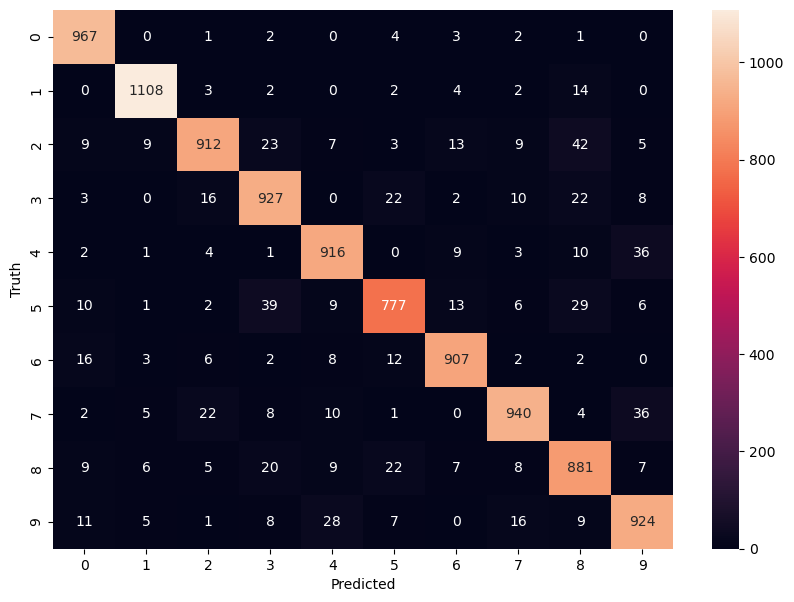

In [63]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [64]:
# adding hidden layers in model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2706 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1213 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9847


In [65]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0731 - accuracy: 0.9765


[0.07307492941617966, 0.9764999747276306]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

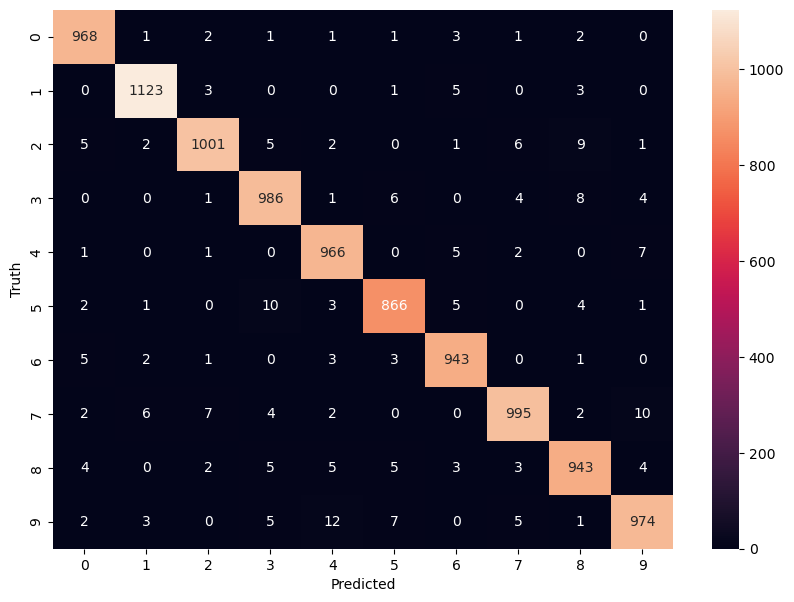

In [66]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [67]:
# flattering the data in keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2700 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1216 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0759 - accuracy: 0.9761


[0.07588474452495575, 0.9761000275611877]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

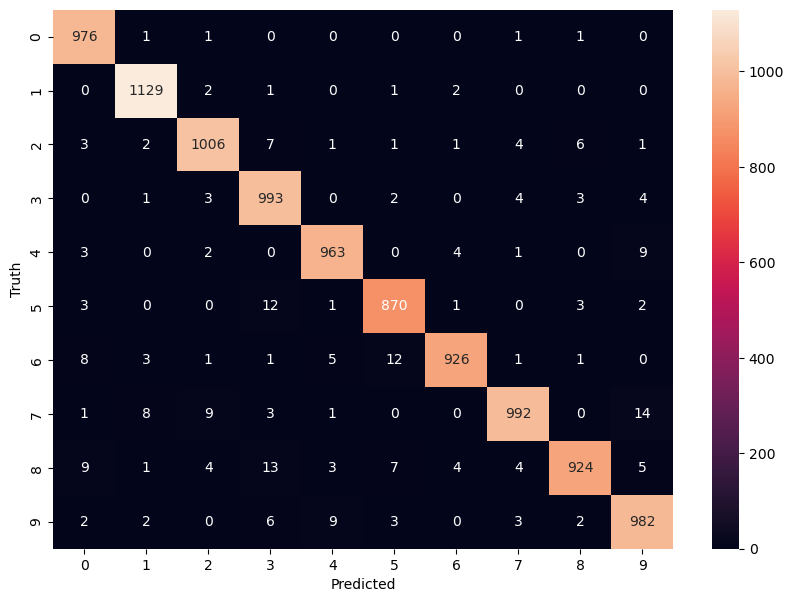

In [68]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")